## Random Forest Classifier

### 1) Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

### 2) Read in Data

In [2]:
## Read in CSV

opal_corsa_01 = pd.read_csv("opel_corsa_01.csv", sep = ';')
opal_corsa_01["Make"] = "Opal_Corsa"
opal_corsa_01["Source File"] = 1


opal_corsa_02 = pd.read_csv("opel_corsa_02.csv", sep = ';')
opal_corsa_02["Make"] = "Opal_Corsa"
opal_corsa_02["Source File"] = 2

peugeot_207_01 = pd.read_csv("peugeot_207_01.csv", sep = ';')
peugeot_207_01["Make"] = "Peugeot_207"
peugeot_207_01["Source File"] = 1

peugeot_207_02 = pd.read_csv("peugeot_207_01.csv", sep = ';')
peugeot_207_02["Make"] = "Peugeot_207"
peugeot_207_02["Source File"] = 2

dataset = [opal_corsa_01, opal_corsa_02, peugeot_207_01, peugeot_207_02]

combined = pd.concat(dataset)

data_pre_cleaning = combined.rename({'Unnamed: 0':'ID'}, axis = 1)

data_pre_cleaning.to_csv("pre_cleaning_dataset.csv",index = False)

In [3]:
data = pd.read_csv("pre_cleaning_dataset.csv", sep = ',')
data["Make_f"] = data["Make"]

##### Add Index:

In [4]:
data = data.set_index(["ID", "Make", "Source File"])

### 3) Data Cleaning

#####  Remove Null values (only 10 of them)

In [5]:
data.shape

(27528, 18)

In [ ]:
#Before removing NA's, want to check they don't belong to "Aggresive" class since there's a pretty bit imbalance

In [6]:
data.isna().any()
is_na = data.isnull()
row_has_NaN = is_na.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,,,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Make_f
ID,Make,Source File,,,,,,,,,,,,,,,,,,
1368,Peugeot_207,1,1.200005,NaN,106.764404,7.678189,-103.5,1.6302,29.803923,79.0,121.0,2377.0,32.380001,43.0,-1.6623,10.790896,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
1369,Peugeot_207,1,2.300003,NaN,106.867239,7.178025,0.0,1.6918,0.000000,79.0,123.0,2328.0,31.160000,42.0,-1.7648,10.794626,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
5916,Peugeot_207,1,0.199997,0.0,13.789830,90.425060,0.0,0.8626,NaN,NaN,NaN,NaN,NaN,NaN,-0.9058,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
8549,Peugeot_207,1,-0.300003,NaN,15.315254,80.259585,0.0,0.8187,NaN,NaN,NaN,NaN,NaN,NaN,-0.7979,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
8550,Peugeot_207,1,0.099998,0.0,14.918644,83.016709,0.0,0.9051,NaN,NaN,NaN,NaN,NaN,NaN,-0.8546,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
8551,Peugeot_207,1,0.000000,0.0,14.522033,85.453810,0.0,0.9423,NaN,NaN,NaN,NaN,NaN,NaN,-0.9309,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
8552,Peugeot_207,1,-0.400002,0.0,14.140677,87.844517,0.0,0.9089,NaN,NaN,NaN,NaN,NaN,NaN,-0.9132,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
1368,Peugeot_207,2,1.200005,NaN,106.764404,7.678189,-103.5,1.6302,29.803923,79.0,121.0,2377.0,32.380001,43.0,-1.6623,10.790896,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207
1369,Peugeot_207,2,2.300003,NaN,106.867239,7.178025,0.0,1.6918,0.000000,79.0,123.0,2328.0,31.160000,42.0,-1.7648,10.794626,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Peugeot_207


In [7]:
data_na_removed = data.dropna()
data_na_removed.shape

(27514, 18)

##### Feature Selection

Divide into x and y here

In [8]:
X = data_na_removed.drop(["roadSurface", "traffic", "drivingStyle"], axis = 1)
X = X.replace('Opal_Corsa', 0)
X = X.replace('Peugeot_207', 1)

In [9]:
y = data_na_removed["drivingStyle"]
y = y.replace('EvenPaceStyle', 0)
y = y.replace('AggressiveStyle', 1)              

##### Look At Correlations

In [10]:
X.corr()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Make_f
AltitudeVariation,1.000000,0.105433,0.116050,-0.117984,-0.005236,0.076112,0.171959,0.046563,0.174590,0.066749,0.105068,0.153506,0.110642,-0.037297,0.069866
VehicleSpeedInstantaneous,0.105433,1.000000,0.877891,-0.146390,0.041952,-0.038693,0.365849,0.165680,0.734615,0.858727,0.829004,0.385530,0.036552,-0.457967,0.104900
VehicleSpeedAverage,0.116050,0.877891,1.000000,-0.101401,-0.066738,0.088886,0.344530,0.232838,0.620890,0.683022,0.655219,0.399386,-0.002086,-0.591756,0.114467
VehicleSpeedVariance,-0.117984,-0.146390,-0.101401,1.000000,0.034689,-0.039038,-0.108516,-0.013564,-0.067857,-0.111598,-0.075565,-0.161375,-0.015604,-0.071172,-0.089909
VehicleSpeedVariation,-0.005236,0.041952,-0.066738,0.034689,1.000000,-0.110432,0.272735,-0.034856,0.243302,0.232191,0.256035,0.049746,0.031443,0.050520,0.002955
LongitudinalAcceleration,0.076112,-0.038693,0.088886,-0.039038,-0.110432,1.000000,-0.000195,0.000617,-0.075380,-0.120889,-0.108588,0.141106,0.702947,-0.010384,0.150634
EngineLoad,0.171959,0.365849,0.344530,-0.108516,0.272735,-0.000195,1.000000,-0.043483,0.517097,0.315610,0.385905,0.370412,-0.020627,-0.166647,0.271148
EngineCoolantTemperature,0.046563,0.165680,0.232838,-0.013564,-0.034856,0.000617,-0.043483,1.000000,0.213972,0.168257,0.088809,0.348581,-0.008351,-0.345680,-0.256474
ManifoldAbsolutePressure,0.174590,0.734615,0.620890,-0.067857,0.243302,-0.075380,0.517097,0.213972,1.000000,0.726961,0.869857,0.236314,0.126819,-0.259836,-0.089992
EngineRPM,0.066749,0.858727,0.683022,-0.111598,0.232191,-0.120889,0.315610,0.168257,0.726961,1.000000,0.885939,0.272676,0.099393,-0.289215,-0.066712


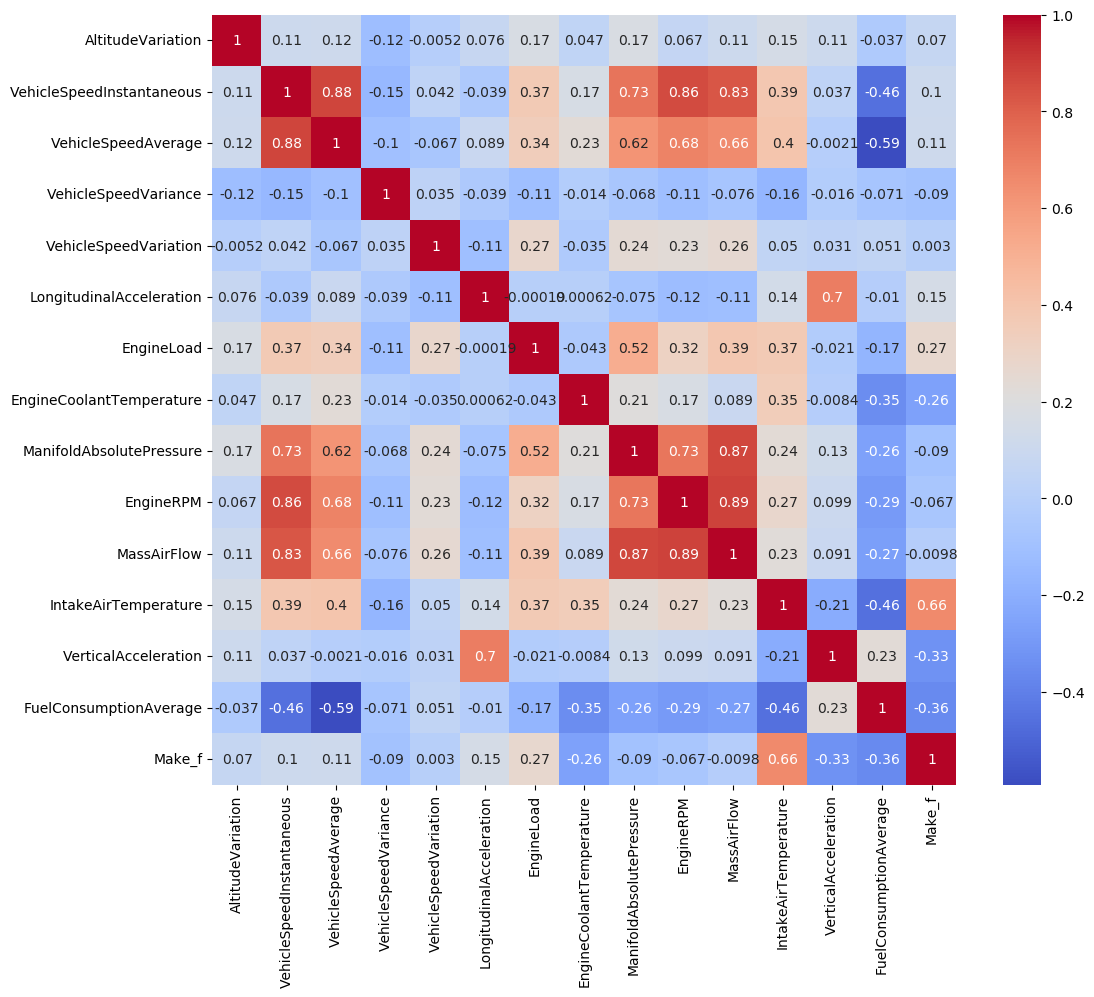

In [11]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [12]:
cor[(cor >0.8) | (cor <-0.8)]

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Make_f
AltitudeVariation,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSpeedInstantaneous,NaN,1.000000,0.877891,NaN,NaN,NaN,NaN,NaN,NaN,0.858727,0.829004,NaN,NaN,NaN,NaN
VehicleSpeedAverage,NaN,0.877891,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSpeedVariance,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSpeedVariation,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongitudinalAcceleration,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineLoad,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineCoolantTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ManifoldAbsolutePressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.869857,NaN,NaN,NaN,NaN
EngineRPM,NaN,0.858727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.885939,NaN,NaN,NaN,NaN


Pairs with Correlation Higher than 0.8: 
- VehicleSpeedAverage & VehicleSpeedInstantaneous (0.877891)
- VehicleSpeedInstantaneous & MassAirFlow (0.829004)
- VehicleSpeedInstantaneous & EngineRPM (0.858727)
- ManifoldAbsolutePressure & MassAirflow (0.869857) 
- MassAirflow & EngineRPM (0.885939)

Check each pair using the SelectKBest Feature to see which is more valuable for prediction:

In [13]:
## VehicleSpeedAverage & VehicleSpeedInstantaneous
fs = SelectKBest(score_func=f_classif, k=1)
X_selected = fs.fit(X[["VehicleSpeedAverage", "VehicleSpeedInstantaneous"]], y)
cols = X_selected.get_support(indices=True)
X_new = X[["VehicleSpeedAverage", "VehicleSpeedInstantaneous"]].iloc[:,cols]
X_new.columns

Index(['VehicleSpeedInstantaneous'], dtype='object')

In [14]:
## MassAirFlow & VehicleSpeedInstantaneous
fs = SelectKBest(score_func=f_classif, k=1)
X_selected = fs.fit(X[["MassAirFlow", "VehicleSpeedInstantaneous"]], y)
cols = X_selected.get_support(indices=True)
X_new = X[["MassAirFlow", "VehicleSpeedInstantaneous"]].iloc[:,cols]
X_new.columns

Index(['VehicleSpeedInstantaneous'], dtype='object')

In [15]:
## EngineRPM & VehicleSpeedInstantaneous
fs = SelectKBest(score_func=f_classif, k=1)
X_selected = fs.fit(X[["EngineRPM", "VehicleSpeedInstantaneous"]], y)
cols = X_selected.get_support(indices=True)
X_new = X[["EngineRPM", "VehicleSpeedInstantaneous"]].iloc[:,cols]
X_new.columns

Index(['VehicleSpeedInstantaneous'], dtype='object')

In [16]:
## ManifoldAbsolutePressure & MassAirFlow
fs = SelectKBest(score_func=f_classif, k=1)
X_selected = fs.fit(X[["ManifoldAbsolutePressure", "MassAirFlow"]], y)
cols = X_selected.get_support(indices=True)
X_new = X[["ManifoldAbsolutePressure", "MassAirFlow"]].iloc[:,cols]
X_new.columns

Index(['MassAirFlow'], dtype='object')

In [17]:
## EngineRPM & MassAirFlow
fs = SelectKBest(score_func=f_classif, k=1)
X_selected = fs.fit(X[["EngineRPM", "MassAirFlow"]], y)
cols = X_selected.get_support(indices=True)
X_new = X[["EngineRPM", "MassAirFlow"]].iloc[:,cols]
X_new.columns

Index(['EngineRPM'], dtype='object')

Propose Two Datasets: 
- Keep VehicleSpeedInstantaneous,  ManifoldAbsolutePressure and remove VehicleSpeedAverage, MassAirflow, EngineRPM
- Remove VehicleSpeedInstantaneous, MassAirflow and Keep EngineRPM, VehicleSpeedAverage, ManifoldAbsolutePressure

##### Feature Importance using SelectKBest

In [18]:
X_1 = X.drop(['VehicleSpeedAverage', 'MassAirFlow', 'EngineRPM'], axis = 1)
X_2 = X.drop(['VehicleSpeedInstantaneous', 'MassAirFlow'], axis = 1)

## Select Top 9 Features for X_1:
fs = SelectKBest(score_func=f_classif, k=9)
# apply feature selection
X_1_selected = fs.fit(X_1, y)
cols = X_1_selected.get_support(indices=True)
X_1_reduced = X_1.iloc[:,cols]


## Select Top 9 Features for X_2:
fs = SelectKBest(score_func=f_classif, k=9)
# apply feature selection
X_2_selected = fs.fit(X_2, y)
cols = X_2_selected.get_support(indices=True)
X_2_reduced = X_2.iloc[:,cols]


In [19]:
X_1_reduced.columns

Index(['AltitudeVariation', 'VehicleSpeedInstantaneous',
       'VehicleSpeedVariance', 'EngineLoad', 'ManifoldAbsolutePressure',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage', 'Make_f'],
      dtype='object')

In [20]:
X_2_reduced.columns

Index(['VehicleSpeedAverage', 'VehicleSpeedVariance', 'EngineLoad',
       'ManifoldAbsolutePressure', 'EngineRPM', 'IntakeAirTemperature',
       'VerticalAcceleration', 'FuelConsumptionAverage', 'Make_f'],
      dtype='object')

### Training the model

##### Using the first set of variables X_1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_1_reduced, y, test_size=0.1, random_state=55)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
clf = RandomForestClassifier(max_depth=5, random_state=45)

To try and improve accuracy wanted to use a grid search on the parameters, but runtime was too long:

In [24]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

In [25]:
CV_rfc.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=45,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'cri

##### Predictions:

In [26]:
#rf_predict = clf.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [26]:
rf_predict = CV_rfc.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


##### Confusion Matrix:

In [27]:
tab = confusion_matrix(y_test, rf_predict)
print(tab)

[[2397   51]
 [ 233   71]]


##### Metrics:

In [28]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2448
           1       0.58      0.23      0.33       304

    accuracy                           0.90      2752
   macro avg       0.75      0.61      0.64      2752
weighted avg       0.88      0.90      0.88      2752



##### Using X_2 Variables:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_2_reduced, y, test_size=0.1, random_state=55)

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
clf = RandomForestClassifier(max_depth=5, random_state=45)

In [39]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

In [40]:
CV_rfc.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=45,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'cri

##### Predictions:

In [41]:
#rf_predict = clf.predict(X_test)

In [42]:
rf_predict = CV_rfc.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


##### Confusion Matrix:

In [43]:
tab = confusion_matrix(y_test, rf_predict)
print(tab)

[[2441    7]
 [ 262   42]]


##### Metrics:

In [44]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2448
           1       0.86      0.14      0.24       304

    accuracy                           0.90      2752
   macro avg       0.88      0.57      0.59      2752
weighted avg       0.90      0.90      0.87      2752



In [ ]:
rf_cv_score = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
np.mean(n_scores)